# Titanic Data Analysis

Documentation of the process to analyze Titanic data. By Tan Suyin

"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class."

Below is a glimpse of the dataset. It is information about Titanic passengers, and whether or not they survived.

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
passenger_df= pd.read_csv("titanic_data.csv")
passenger_df.head(6)

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Questions posed

We know (from the movie...), that survivors were mostly people who were given preference on the limited lifeboats. There were also a small number of lucky people who survived the ice cold water as more help arrived, (is this true, or just in the movie?)

1. What factors made people more likely to survive(be given preference on lifeboats)? Is it age(the very old and the very young), gender(the weaker sex: female), familial groupsize(larger families survive better than single passengers), socio-class(rich vs poor), being a member of/related to the cabin crew?

2. Why are there missing age values (20% of passengers)? While data collection methods in 1912 must have been challenging, can we also attribute it to the possibility that non-survivors and survivors who had no age data either travelled alone or did not have family/surviving family members who were on board Titanic? 



# How many survived, how many didn't?
While the true total number of passengers and crew was 2224 (survivors:722[32%], non-survivors: 1502[68%]), our dataset only contains a subset of that population. However the ratio of survivors (one-third) and non-survivors (two-thirds) in this subset and in the true dataset are similar. So we will study this subset as a sampling of the overall actual population (make sense?). 

In this dataset, the Total passengers are 891. Total survivors are 342 (38%). Total non-survivors are 549 (62%).

In [3]:
survival_groups=passenger_df.groupby('Survived')
survival_groups['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

# Explore/Validate data for findings 

In [4]:
#Validate that all passengers have Survived values
print("Total passengers with Survived values above:", survival_groups['PassengerId'].count().sum()
       , "\n Total passengers :", passenger_df['PassengerId'].count())

('Total passengers with Survived values above:', 891, '\n Total passengers :', 891)


Let's check our data about age, whether we have missing values.

In [5]:
passenger_df.loc[pd.isna(passenger_df['Age'])].count()

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

There are 177 passengers who are missing age data, that is 20% of the people on board. Perhaps this is because they did not survive to tell their age, nor did their family if they had any. Let's check.

#### Why are there missing age values for 20% of the passengers in our dataset?


In [6]:
survival_groups['Age'].apply(lambda x: pd.isna(x).sum()).reset_index(name='Count of people with Age=NaN')
#note: use sum() for boolean to add up. count() does not work.  

,Survived,Count of people with Age=NaN
0,0,125
1,1,52


As suspected, most of the people with NaN values for age, did not survive. Wonder how many among them had surviving family members? However, 52 of the people who survived had not supplied their age for some reason. 

In [7]:
#create new column in df for Surname


- Most of the people with NaN age were non-survivors(70% or 125), while 30% (52) of these people did survive but had supplied their age.
- 549 is the total non-survivors, while 125 of them did not have age data (20% of the non-survivors), so why did 80% who did not survive have age values? Did they have surviving family connections, or they didn't either, maybe they had families that weren't on board but came forward to supply the deceased data.
- Data collectors in the 1910s must have faced many challenges. However, it's also likely that non-survivors and survivors who had no age data either travelled alone or did not have family/surviving family members who were on board Titanic. 
We'll check this out later

# Is age a factor in survival?

In [8]:
survival_groups['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [9]:
survival_groups['Age'].std()

Survived
0    14.172110
1    14.950952
Name: Age, dtype: float64

In [10]:
survival_groups['Age'].min()

Survived
0    1.00
1    0.42
Name: Age, dtype: float64

In [11]:
survival_groups['Age'].max()

Survived
0    74.0
1    80.0
Name: Age, dtype: float64

In [12]:
survival_groups['Age'].median()

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

The above doesn't really tell much, as we are comparing individual to individual, so to speak.
Let's divide the people into age groups to see which is the Largest age group of survivors vs non-survivors. 
Below shows the graph of age groups (below: Didn't survive. far below: survived)

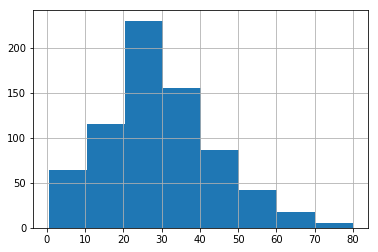

In [13]:
# Histogram of total passenger age
passenger_df['Age'].hist(bins=8)

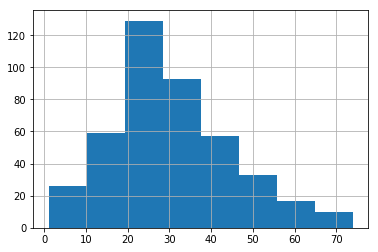

In [14]:
# Histogram of non-survivors' age
survival_groups['Age'].get_group(0).hist(bins=8)


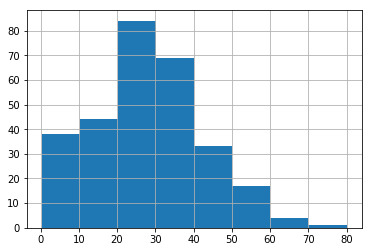

In [15]:
# Histogram of survivors' age
survival_groups['Age'].get_group(1).hist(bins=8)

Findings: 
1) Mean, Standard Deviation, Min & Max age of survivors vs non-survivors is pretty similar.
2) Histogram of non-survivors' age has the same shape of Histogram of total passenger age. (what does that tell us? Ratioly similar?)


When we divide them into age groups, we see a clearer pattern, there were more children(below 20) who survived, and old folks didn't survive as much. Now we're not sure whether it was a case of human selection for the limited boat seats, or the natural selection in terms of fitness and strength due to age. However, we can consider it as the former, as we know some facts, that the Titanic actually took 2 to 3 hours to finally sink. (wonder how many survived without the boats, like Rose in the cold icy water) The middle age groups are the highest, no only because passengers were mostly middle age, so it's no surprise they were constantly the highest in either group. 

Let's plot piecharts of age groups. and see the percentage in each. 

In [16]:
# Add Age Group column to dataset
passenger_df['AgeGrp']= (passenger_df['Age']//10)*10
passenger_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN


In [17]:
survival_age_groups =passenger_df.groupby(['Survived','AgeGrp'])
#survival_age_groups['AgeGrp'].get_group([0,1]).hist(bins=8)
survival_age_groups.aggregate(sum)

PassengerId  Pclass      Age  SibSp  Parch       Fare
Survived AgeGrp                                                       
0        0.0            8930      70   121.00     80     36   844.4083
         10.0          27565     168  1029.50     50     26  1369.7000
         20.0          61524     378  3484.50     40     21  2839.9829
         30.0          46364     231  3189.50     27     28  1671.1831
         40.0          23992     127  2417.00     19     32  1351.8916
         50.0          11056      50  1501.50      4      5   892.5167
         60.0           5125      19   816.00      2      6   586.4875
         70.0           2979      11   426.50      1      1   181.1834
1        0.0           17404      93   132.17     35     51  1051.3458
         10.0          17760      84   682.00     18     22  1948.8835
         20.0          33787     161  1913.00     31     34  3161.3833
         30.0          32535     122  2473.50     32     27  5071.8250
         40.0          17447      48  1505.00     14     10  2030.3128
         50.0          10073      25  1064.00     10      8  1408.2833
         60.0           3116       9   370.00      3      1   332.4958
         80.0            631       1    80.00      0      0    30.0000

In [18]:
survival_age_groups.describe()

Age                                                    \
                 count       mean       std    min     25%    50%    75%   
Survived AgeGrp                                                            
0        0.0      24.0   5.041667  3.127427   1.00   2.000   4.00   8.25   
         10.0     61.0  16.877049  2.360536  10.00  16.000  18.00  19.00   
         20.0    143.0  24.367133  2.891191  20.00  22.000  24.00  27.00   
         30.0     94.0  33.930851  2.961764  30.00  31.000  34.00  36.00   
         40.0     55.0  43.945455  2.714284  40.00  42.000  44.00  46.00   
         50.0     28.0  53.625000  3.008091  50.00  51.000  54.00  56.00   
         60.0     13.0  62.769231  2.127355  60.00  61.000  62.00  65.00   
         70.0      6.0  71.083333  1.497220  70.00  70.125  70.75  71.00   
1        0.0      38.0   3.478158  2.489255   0.42   1.000   3.00   5.00   
         10.0     41.0  16.634146  2.130212  11.00  15.000  17.00  18.00   
         20.0     77.0  24.844156  2.636110  20.00  23.000  24.00  27.00   
         30.0     73.0  33.883562  2.749395  30.00  32.000  34.00  36.00   
         40.0     34.0  44.264706  3.240920  40.00  42.000  44.00  48.00   
         50.0     20.0  53.200000  2.858045  50.00  50.750  52.50  55.25   
         60.0      6.0  61.666667  1.366260  60.00  60.500  62.00  62.75   
         80.0      1.0  80.000000       NaN  80.00  80.000  80.00  80.00   

                        Fare            ...  Pclass       SibSp            \
                  max  count       mean ...     75%  max  count      mean   
Survived AgeGrp                         ...                                 
0        0.0      9.0   24.0  35.183679 ...    3.00  3.0   24.0  3.333333   
         10.0    19.0   61.0  22.454098 ...    3.00  3.0   61.0  0.819672   
         20.0    29.0  143.0  19.860020 ...    3.00  3.0  143.0  0.279720   
         30.0    39.0   94.0  17.778544 ...    3.00  3.0   94.0  0.287234   
         40.0    49.0   55.0  24.579847 ...    3.00  3.0   55.0  0.345455   
         50.0    59.0   28.0  31.875596 ...    2.00  3.0   28.0  0.142857   
         60.0    66.0   13.0  45.114423 ...    2.00  3.0   13.0  0.153846   
         70.0    74.0    6.0  30.197233 ...    2.75  3.0    6.0  0.166667   
1        0.0      9.0   38.0  27.666995 ...    3.00  3.0   38.0  0.921053   
         10.0    19.0   41.0  47.533744 ...    3.00  3.0   41.0  0.439024   
         20.0    29.0   77.0  41.056926 ...    3.00  3.0   77.0  0.402597   
         30.0    39.0   73.0  69.477055 ...    2.00  3.0   73.0  0.438356   
         40.0    49.0   34.0  59.715082 ...    2.00  3.0   34.0  0.411765   
         50.0    58.0   20.0  70.414165 ...    1.25  2.0   20.0  0.500000   
         60.0    63.0    6.0  55.415967 ...    1.75  3.0    6.0  0.500000   
         80.0    80.0    1.0  30.000000 ...    1.00  1.0    1.0  0.000000   

                                                    
                      std  min  25%  50%  75%  max  
Survived AgeGrp                                     
0        0.0     1.239448  0.0  3.0  4.0  4.0  5.0  
         10.0    1.420190  0.0  0.0  0.0  1.0  5.0  
         20.0    0.549079  0.0  0.0  0.0  0.0  2.0  
         30.0    0.499943  0.0  0.0  0.0  1.0  2.0  
         40.0    0.551704  0.0  0.0  0.0  1.0  2.0  
         50.0    0.356348  0.0  0.0  0.0  0.0  1.0  
         60.0    0.375534  0.0  0.0  0.0  0.0  1.0  
         70.0    0.408248  0.0  0.0  0.0  0.0  1.0  
1        0.0     0.996794  0.0  0.0  1.0  1.0  4.0  
         10.0    0.776169  0.0  0.0  0.0  1.0  4.0  
         20.0    0.693195  0.0  0.0  0.0  1.0  3.0  
         30.0    0.645202  0.0  0.0  0.0  1.0  3.0  
         40.0    0.499554  0.0  0.0  0.0  1.0  1.0  
         50.0    0.688247  0.0  0.0  0.0  1.0  2.0  
         60.0    0.547723  0.0  0.0  0.5  1.0  1.0  
         80.0         NaN  0.0  0.0  0.0  0.0  0.0  

[16 rows x 48 columns]

In [19]:
survival_age_groups.count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived AgeGrp                                                              
0        0.0              24      24    24   24   24     24     24      24   
         10.0             61      61    61   61   61     61     61      61   
         20.0            143     143   143  143  143    143    143     143   
         30.0             94      94    94   94   94     94     94      94   
         40.0             55      55    55   55   55     55     55      55   
         50.0             28      28    28   28   28     28     28      28   
         60.0             13      13    13   13   13     13     13      13   
         70.0              6       6     6    6    6      6      6       6   
1        0.0              38      38    38   38   38     38     38      38   
         10.0             41      41    41   41   41     41     41      41   
         20.0             77      77    77   77   77     77     77      77   
         30.0             73      73    73   73   73     73     73      73   
         40.0             34      34    34   34   34     34     34      34   
         50.0             20      20    20   20   20     20     20      20   
         60.0              6       6     6    6    6      6      6       6   
         80.0              1       1     1    1    1      1      1       1   

                 Fare  Cabin  Embarked  
Survived AgeGrp                         
0        0.0       24      2        24  
         10.0      61      4        61  
         20.0     143      9       143  
         30.0      94     12        94  
         40.0      55     14        55  
         50.0      28     11        28  
         60.0      13      6        13  
         70.0       6      2         6  
1        0.0       38      8        38  
         10.0      41     15        41  
         20.0      77     27        77  
         30.0      73     38        72  
         40.0      34     19        34  
         50.0      20     13        20  
         60.0       6      4         5  
         80.0       1      1         1

In [20]:
survival_age_groups.size()
# print survival_age_groups.groups.keys()

Survived  AgeGrp
0         0.0        24
          10.0       61
          20.0      143
          30.0       94
          40.0       55
          50.0       28
          60.0       13
          70.0        6
1         0.0        38
          10.0       41
          20.0       77
          30.0       73
          40.0       34
          50.0       20
          60.0        6
          80.0        1
dtype: int64

In [26]:
# Problem, can't loop thru survival_age_groups.size(), it's a series
# what is this code doing?
# for survival, agegrp in survival_age_groups.groups:
#     print survival, agegrp

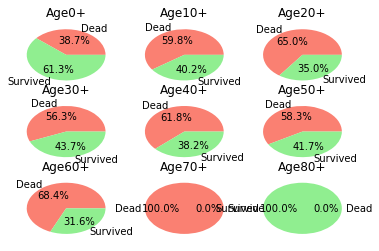

In [22]:
dead_alive_agegrp_dict=dict()
dead_alive_agegrp_dict[0]= [24 ,38]
dead_alive_agegrp_dict[10]=[61 ,  41]
dead_alive_agegrp_dict[20]=[143,  77]
dead_alive_agegrp_dict[30]=[94 ,  73]
dead_alive_agegrp_dict[40]=[55 ,  34]
dead_alive_agegrp_dict[50]=[28 ,  20]
dead_alive_agegrp_dict[60]=[13 ,   6]
dead_alive_agegrp_dict[70]=[ 6 ,   0]
dead_alive_agegrp_dict[80]=[ 0,   1]


labels=['Dead','Survived']
colors=['salmon', 'lightgreen']
i=0

# dead_alive_agegrp_dict.keys
for agegrp, dead_alive_count in sorted(dead_alive_agegrp_dict.items()):
    i+=1
    plt.axis=plt.subplot(3,3,i)
    plt.pie(dead_alive_count, labels=labels, autopct='%1.1f%%', colors=colors);
    title='Age' + str(agegrp)+'+'
    plt.title(title)


From the above pie charts that pools people into age decades, we seem to be able to conclude a few things:
1. If you were a kid under 10, you'd have a higher chance of surviving, that is 61% chance. 
2. People in their 30s survived better than people in their 20s.

If there is very few people (data points) in that category to begin with, then there is no strong case to be made.
Weak cases:
1. People in their 70s did not survive at all. But there were only 6 of them. 
2. The last piechart is not to be believed, because there was only 1 person in their 80s, who happen to survive, so he might be an exception. 


AgeGrp
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
dtype: int64


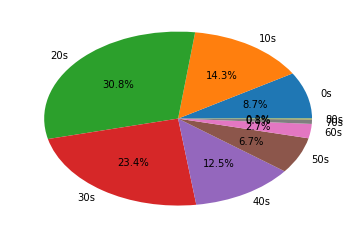

In [38]:
passengers_agegrp=passenger_df.groupby('AgeGrp')
print passengers_agegrp.size()
labels=['0s','10s','20s','30s','40s','50s','60s','70s', '80s']
plt.pie(passengers_agegrp.size(), labels=labels, autopct='%1.1f%%');

The above pooling is by 10s, let's pool them into by 20s, which fit below societal labels:

Kids(age 0 - 20), Adults (age 20 - 40), Senior (age 40 to 60), Old (age 60+)

OR
Kids(age 0 - 15), Youth (age 16 - 29), Middle age (age 30 - 50), Senior(age 45 - 60), Old (age 60+)




In [53]:
# Grouping into new_dict agegroups by 20s.
dead_alive_agegrp_new_dict=dict()
for x in range(0,80,20):
    dead_alive_agegrp_new_dict[x]=np.array(dead_alive_agegrp_dict[x]) + np.array(dead_alive_agegrp_dict[x+10]) 
sum(dead_alive_agegrp_new_dict)

{0: array([85, 79]),
 20: array([237, 150]),
 40: array([83, 54]),
 60: array([19,  6])}

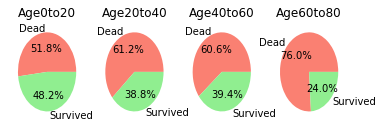

In [57]:
labels=['Dead','Survived']
colors=['salmon', 'lightgreen']
i=0

# dead_alive_agegrp_dict.keys
for agegrp, dead_alive_count in sorted(dead_alive_agegrp_new_dict.items()):
    i+=1
    plt.axis=plt.subplot(2,4,i)
    plt.pie(dead_alive_count, labels=labels, autopct='%1.1f%%', colors=colors);
    title='Age' + str(agegrp)+'to'+str(agegrp+20)
    plt.title(title)

[164, 387, 137, 25]


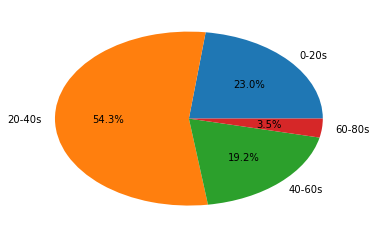

In [68]:
sum_list=[]
for x in range(0,80,20):
    sum_list.append(sum(dead_alive_agegrp_new_dict[x]))

print sum_list
labels=['0-20s','20-40s','40-60s','60-80s']
plt.pie(sum_list, labels=labels, autopct='%1.1f%%');

# Is gender a factor in survival?

In [24]:
survival_groups['Sex'].count

<bound method SeriesGroupBy.count of <pandas.core.groupby.SeriesGroupBy object at 0x000000001008D550>>